In [14]:
import longi_class as lc
import analysis_functions as af
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

import plotting_functions as pf

In [15]:
names = af.assemble_names('/home/dprotter/Downloads/Sex_Differences_CSV')
sum_files = [file for file in sorted(names) if 'summary' in file]

In [16]:
f = '/home/dprotter/Downloads/Sex_Differences_CSV/6_14_2021__7_52__Magazine_vole_4140.csv'
with open(f) as file:
    dat = [line for line in file]

['vole:4140',
 'day:1',
 'experiment:Magazine',
 'user:nan',
 'output_directory:/home/pi/Desktop/Sex_Differences_cohort_1/daily_output/',
 'date:6/14/2021',
 'done:False',
 'experiment_status:nan',
 'rounds:20',
 'rounds_completed:nan',
 'run_time:6_14_2021__7_52_',
 'script:Magazine',
 '\n']

In [17]:
lon_ana = lc.LongitudinalAnalysis('all_exp')
for f in sum_files:
    lon_ana.add_summary_csv(f)

1d, dtype, copy=True)
  File "/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/dtypes/cast.py", line 966, in astype_nansafe
    return lib.astype_intsafe(arr.ravel(), dtype).reshape(arr.shape)
  File "pandas/_libs/lib.pyx", line 617, in pandas._libs.lib.astype_intsafe
ValueError: invalid literal for int() with base 10: '1.0'
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/home/dprotter/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future wil

In [18]:
mets = lon_ana.metrics

In [19]:
mets

{'rounds': <longi_class.Metric at 0x7f65d1e82f70>,
 'total_lever_press': <longi_class.Metric at 0x7f65d1e82820>,
 'non_press_rounds': <longi_class.Metric at 0x7f65d1e82160>,
 'prop_non_presses_by_rounds': <longi_class.Metric at 0x7f65d1e82850>,
 'percent_food_presses': <longi_class.Metric at 0x7f65d1fb2a30>,
 'mean_food_lever_press_latency': <longi_class.Metric at 0x7f65d0080c40>,
 'median_food_lever_press_latency': <longi_class.Metric at 0x7f65d1e82bb0>,
 'mean_pellet_latency': <longi_class.Metric at 0x7f65d1e68a60>,
 'median_pellet_latency': <longi_class.Metric at 0x7f65d1e9f550>,
 'num_pellet_retrieved': <longi_class.Metric at 0x7f65d1e63df0>,
 'proportion_round_pellet_retrieved': <longi_class.Metric at 0x7f65d1e631c0>,
 'proportion_pellet_retrieved': <longi_class.Metric at 0x7f65d1e637f0>,
 'animal_ID': <longi_class.Metric at 0x7f65cb7ded90>,
 'day': <longi_class.Metric at 0x7f65d1e63820>,
 'experiment': <longi_class.Metric at 0x7f65d02fab20>,
 'date': <longi_class.Metric at 0x7f65

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python3.8/site-packages/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/dprotter/anaconda3/envs/computing/lib/python

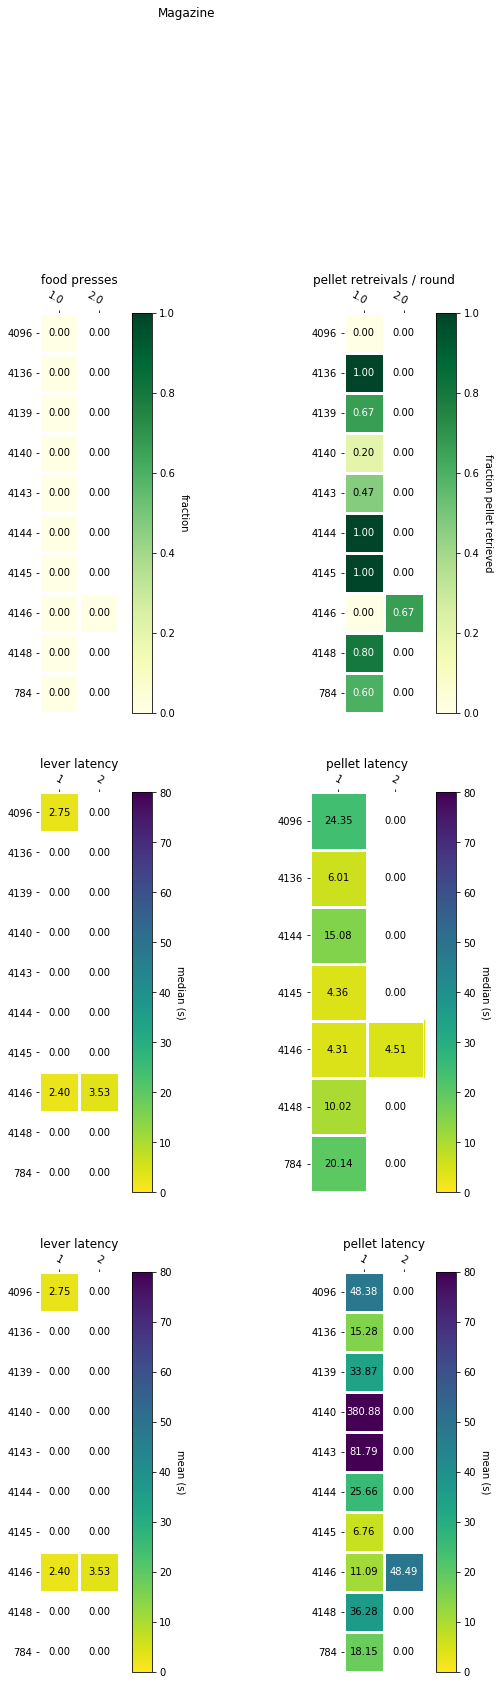

In [20]:
if 'Magazine' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Magazine'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,25)) 


    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

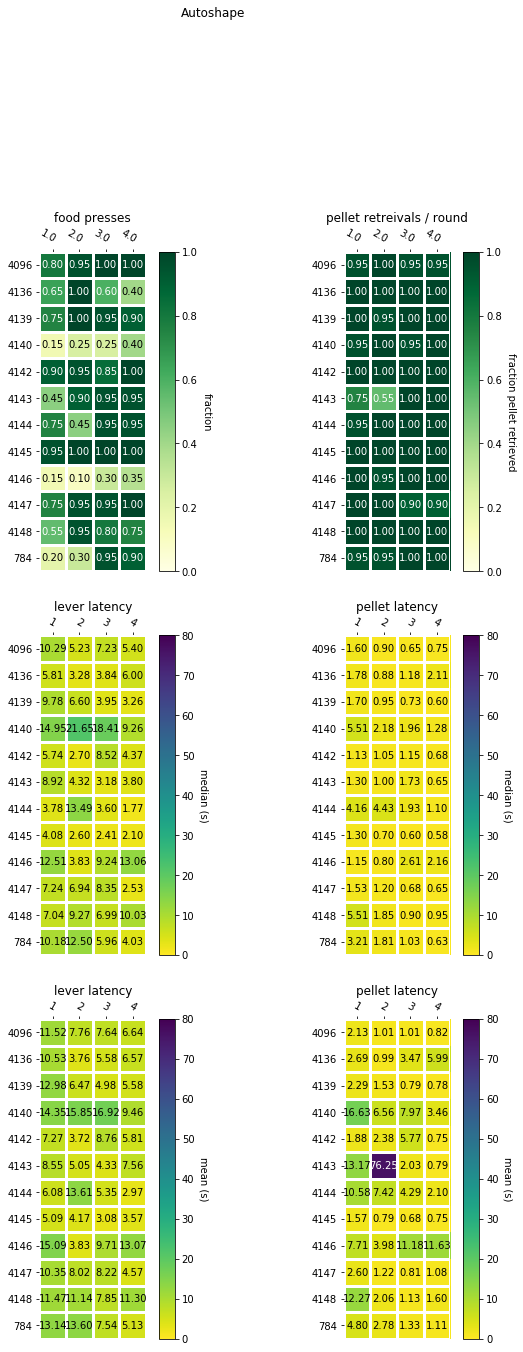

In [21]:

if 'Autoshape' in lon_ana.experiments:

    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (10,20)) 


    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])



    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)


    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'mean_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'mean (s)', ax = axs[2,0], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)



    metric = 'mean_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'mean (s)', ax = axs[2,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

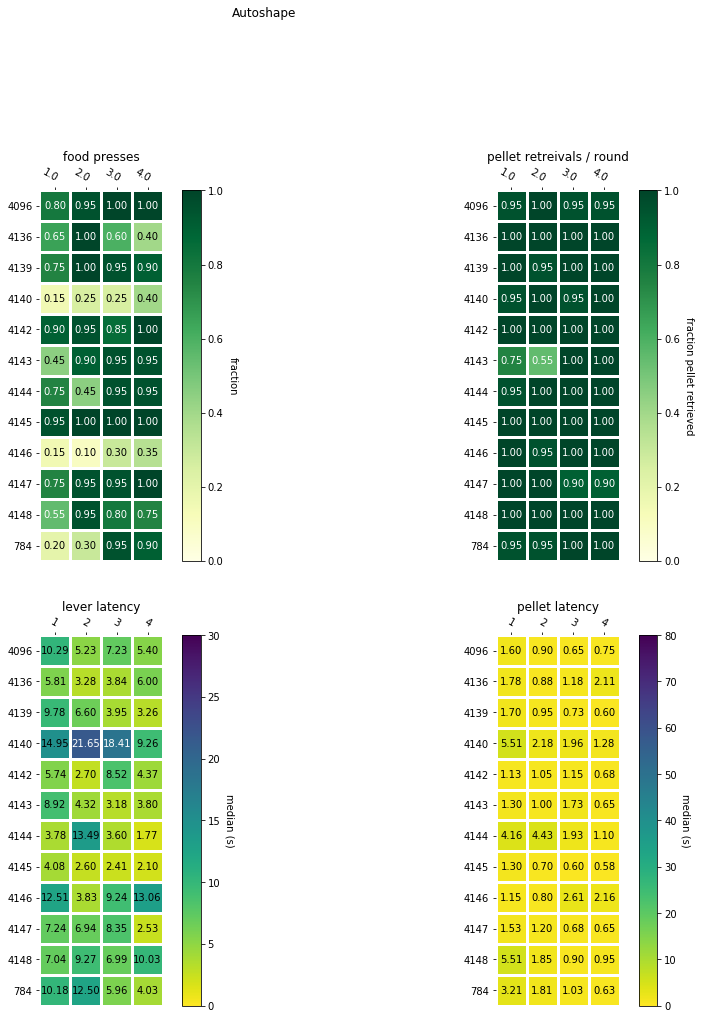

In [24]:
if 'Autoshape' in lon_ana.experiments:
    metric = 'percent_food_presses'
    experiment = 'Autoshape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (15,15)) 


    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'food presses', cbarlabel = 'fraction', ax = axs[0,0])

    metric = 'proportion_round_pellet_retrieved'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet retreivals / round', cbarlabel = 'fraction pellet retrieved', ax = axs[0,1])

    cmap_r = plt.cm.get_cmap('viridis').reversed()
    metric = 'median_food_lever_press_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'lever latency', cbarlabel = 'median (s)', ax = axs[1,0], 
                        cmap = cmap_r, val_ceil = 30, val_floor = 0)


    metric = 'median_pellet_latency'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    ax = pf.make_heatmap(vals, ani, days, title = 'pellet latency', cbarlabel = 'median (s)', ax = axs[1,1], 
                        cmap = cmap_r, val_ceil = 80, val_floor = 0)
    fig.suptitle(experiment, y = 1.05)

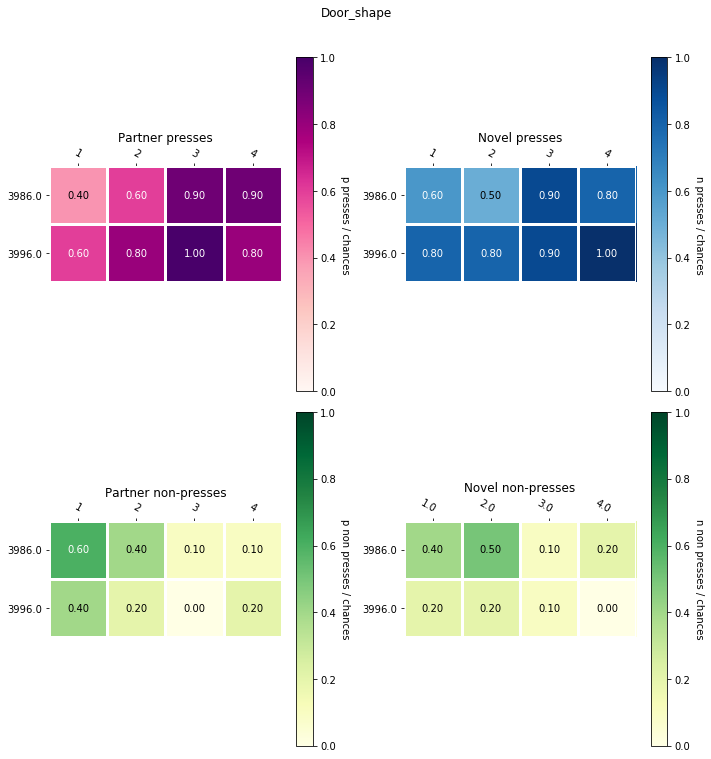

In [8]:

if 'Door_shape' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_shape'

    fig, axs = plt.subplots(ncols = 2, nrows = 2, figsize = (10, 10))

    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses / chances',
                        cmap = 'RdPu')

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0,1],
                        title = "Novel presses", 
                        cbarlabel = 'n presses / chances',
                        cmap = 'Blues')

    metric = 'door_1_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,0],
                        title = "Partner non-presses", 
                        cbarlabel = 'p non presses / chances',
                        cmap = 'YlGn')

    metric = 'door_2_non_press_round_proportion'
    experiment = 'Door_shape'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1,1],
                        title = "Novel non-presses", 
                        cbarlabel = 'n non presses / chances',
                        cmap = 'YlGn')

    fig.suptitle(experiment, y = 1.05)
    fig.tight_layout()

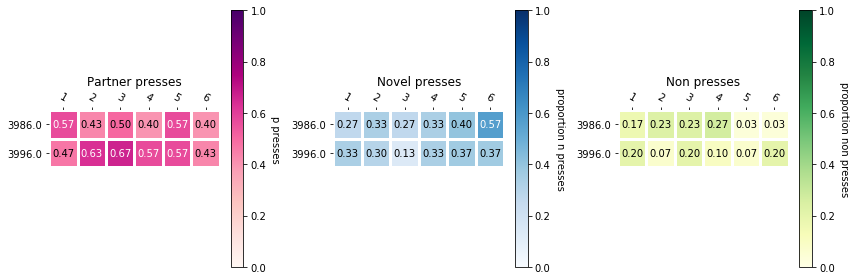

In [9]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_round_proportion'
    experiment = 'Door_test'

    fig, axs = plt.subplots(ncols = 3, figsize = (12,4))

    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[0],
                        title = "Partner presses", 
                        cbarlabel = 'p presses',
                        cmap = 'RdPu', val_floor = 0, val_ceil = 1)

    metric = 'door_2_lever_press_round_proportion'
    experiment = 'Door_test'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[1],
                        title = "Novel presses", 
                        cbarlabel = 'proportion n presses',
                        cmap = 'Blues')

    metric = 'prop_non_presses_by_rounds'
    experiment = 'Door_test'
    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = axs[2],
                        title = "Non presses", 
                        cbarlabel = 'proportion non presses',
                        cmap = 'YlGn')
    fig.tight_layout()

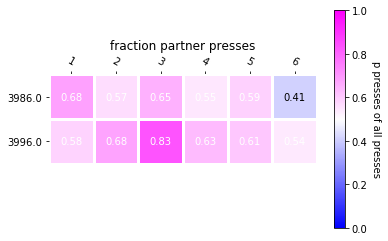

In [11]:
if 'Door_test' in lon_ana.experiments:
    metric = 'door_1_lever_press_total_press_proportion'
    experiment = 'Door_test'

    cmap = pf.get_continuous_cmap(['#0000FF','#FFFFFF','#ff00ff'])


    fig, ax = plt.subplots()

    ani, days, vals = lon_ana.get_data(metric, experiment = experiment, dataset = lon_ana)
    a = pf.make_heatmap(vals, ani, days, ax = ax,
                        title = "fraction partner presses", 
                        cbarlabel = 'p presses of all presses',
                        cmap = cmap, val_floor = 0, val_ceil = 1)

In [26]:
mets['non_press_rounds'].data

,animal,day,value,experiment,file
23,4096,1,4,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
24,4096,2,1,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
36,4096,3,0,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
48,4096,4,0,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
0,4096,1,14,Magazine,/home/dprotter/Downloads/Sex_Differences_CSV/6...
16,4136,1,7,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
25,4136,2,0,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
37,4136,3,8,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
49,4136,4,12,Autoshape,/home/dprotter/Downloads/Sex_Differences_CSV/6...
2,4136,1,15,Magazine,/home/dprotter/Downloads/Sex_Differences_CSV/6...
